In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Directories
train_dir = r"E:\CAPSTONE\Bird_Species_Classification\DataSet_V3_7525\train"
val_dir = r"E:\CAPSTONE\Bird_Species_Classification\DataSet_V3_7525\val"
test_dir = r"E:\CAPSTONE\Bird_Species_Classification\DataSet_V3_7525\test"

# 1. Load Dataset
print("Loading datasets...")
train_ds = image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32
)

val_ds = image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=32
)

test_ds = image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=32
)


Loading datasets...
Found 3897 files belonging to 14 classes.
Found 1305 files belonging to 14 classes.
Found 1740 files belonging to 14 classes.


In [2]:

# Extract class names before applying prefetching
class_names = train_ds.class_names
print(f"Class names: {class_names}")

# Apply prefetching for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 2. Build the Model
print("Building model...")
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Add the head of the model
model = models.Sequential([
    data_augmentation,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')  # Use extracted class names
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Train the Model
print("Training model...")
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10  # You can adjust this
)


Class names: ['Ashy crowned sparrow lark', 'Asian Openbill', 'Black-headed ibis', 'Crow', 'Eurasian Coot', 'Indian Roller', 'Large-billed Crow', 'Little Cormorant', 'Paddyfield pipit', 'Painted Stork', 'Red-wattled lapwing', 'Spot-billed Pelician', 'White-breasted Waterhen', 'Yellow wattled lapwing']
Building model...
Training model...
Epoch 1/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 903s 6s/step - accuracy: 0.5207 - loss: 1.6646 - val_accuracy: 0.8797 - val_loss: 0.3835
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 729s 6s/step - accuracy: 0.8255 - loss: 0.5252 - val_accuracy: 0.9218 - val_loss: 0.2292
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 761s 6s/step - accuracy: 0.8777 - loss: 0.3628 - val_accuracy: 0.9441 - val_loss: 0.1666
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 678s 6s/step - accuracy: 0.9039 - loss: 0.2819 - val_accuracy: 0.9533 - val_loss: 0.1517
Epoch 5/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 673s 6s/step - accuracy: 0.9151 - loss: 0.2422 - val_accuracy: 0.9425 - val_loss: 0.1679
Epoch 6/10
122/12

In [3]:

# 4. Evaluate the Model
print("Evaluating model...")
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Evaluating model...
55/55 ━━━━━━━━━━━━━━━━━━━━ 255s 5s/step - accuracy: 0.9547 - loss: 0.1133
Test Accuracy: 96.44%


In [4]:

# 5. Save the Model
print("Saving model...")
model.save("Model_V3_7525.h5")


Saving model...


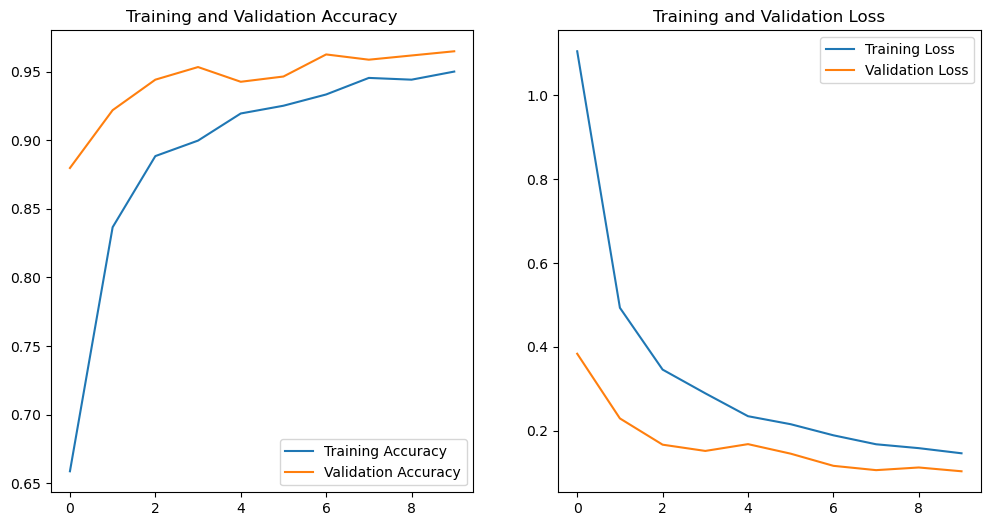

In [5]:

# 6. Load and Test the Model with a New Image
def predict_image(image_path):
    print(f"Predicting image: {image_path}")
    model = tf.keras.models.load_model("bird_species_detection_model.h5")
    img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]  # Use extracted class names
    print(f"Predicted Class: {predicted_class}")
    return predicted_class

# Example Prediction
# Replace 'path_to_image.jpg' with your image path
# predicted_class = predict_image(r"E:\CAPSTONE\example_image.jpg")

# 7. Plot Training History
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# Plot the training history
plot_history(history)


Found 1740 images belonging to 14 classes.


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 447s 8s/step


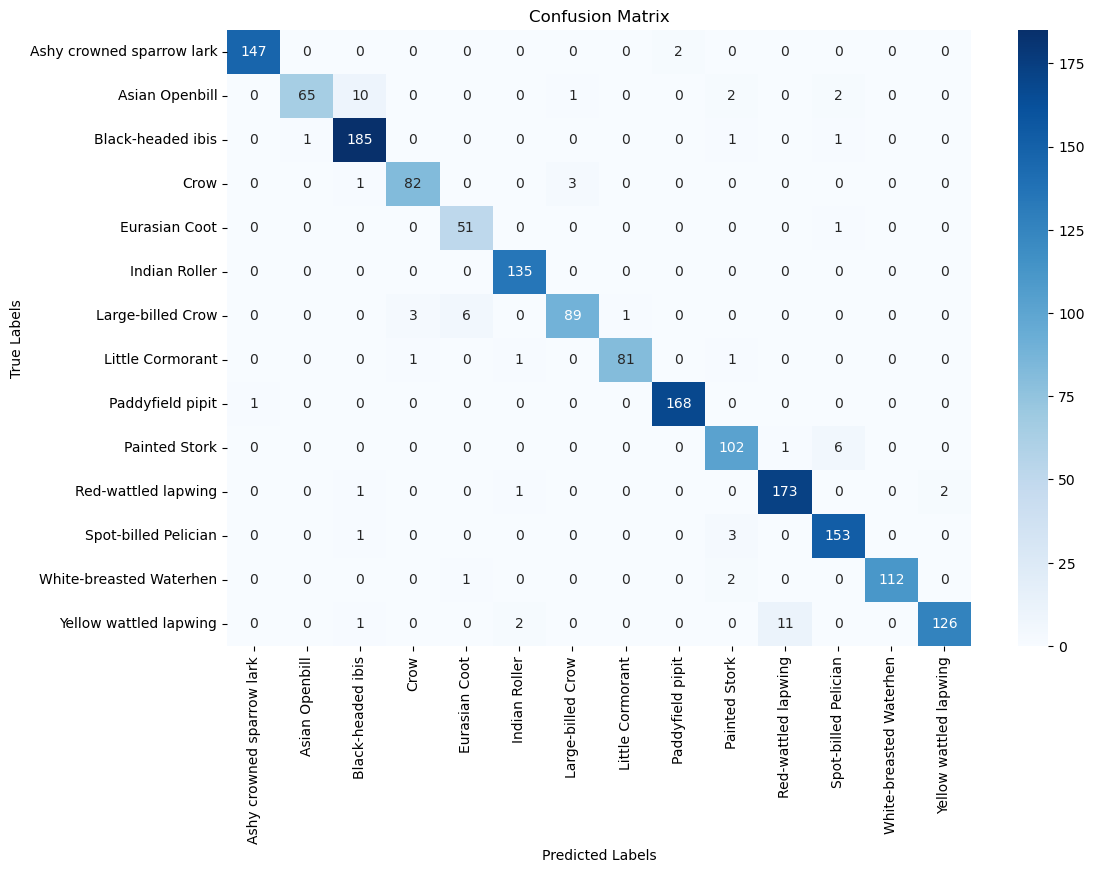

Classification Report:
                            precision    recall  f1-score   support

Ashy crowned sparrow lark       0.99      0.99      0.99       149
           Asian Openbill       0.98      0.81      0.89        80
        Black-headed ibis       0.93      0.98      0.96       188
                     Crow       0.95      0.95      0.95        86
            Eurasian Coot       0.88      0.98      0.93        52
            Indian Roller       0.97      1.00      0.99       135
        Large-billed Crow       0.96      0.90      0.93        99
         Little Cormorant       0.99      0.96      0.98        84
         Paddyfield pipit       0.99      0.99      0.99       169
            Painted Stork       0.92      0.94      0.93       109
      Red-wattled lapwing       0.94      0.98      0.96       177
     Spot-billed Pelician       0.94      0.97      0.96       157
  White-breasted Waterhen       1.00      0.97      0.99       115
   Yellow wattled lapwing       0.98 

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the model
model = load_model('Model_V3_7525.h5')

# Path to test data
test_dir = r'E:\CAPSTONE\Bird_Species_Classification\DataSet_V3_7525\test'

# Image data generator for preprocessing
test_datagen = ImageDataGenerator()

# Load test data
test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),  # Adjust size as per your model's input
    batch_size=32,
    class_mode='categorical',  # Use 'binary' if you have two classes
    shuffle=False  # Do not shuffle to match predictions with true labels
)

# Get class indices
class_indices = test_data.class_indices
class_labels = list(class_indices.keys())

# Predict on test data
predictions = model.predict(test_data)
y_pred = np.argmax(predictions, axis=1)
y_true = test_data.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:\n", report)
